# Cluster Analysis

This notebook analyzes the results of different clustering algorithms applied to the client features dataset.

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from IPython.display import Image, display

# Set plot style
sns.set_style("whitegrid")

## Load Data

In [2]:
df = pd.read_csv('../data/04-processed/client_features.csv')
df.head()

average_of_days_per_routine  routines_count  gender_encoded  tenure_months  \
0                     1.000000               4               0              5   
1                     2.357143              28               0             37   
2                     3.500000               6               0              9   
3                     2.625000              32               1             37   
4                     1.736842              19               0             36   

   recency_months  kmeans_cluster_2_pca  kmeans_cluster_3_pca  \
0              37                     1                     2   
1               5                     0                     1   
2              33                     1                     2   
3               3                     0                     1   
4               6                     0                     1   

   kmeans_cluster_2  kmeans_cluster_3  dbscan_cluster_pca  dbscan_cluster  \
0                 1                 2                   0               0   
1                 0                 0                  -1              -1   
2                 1                 2                   2               0   
3                 0                 0                  -1              -1   
4                 0                 0                  -1              -1   

   hierarchical_cluster_pca  hierarchical_cluster  
0                         0                     0  
1                         1                     1  
2                         0                     0  
3                         1                     1  
4                         1                     1

## Feature Distribution by Cluster

We will look at how the features (`average_of_days_per_routine`, `routines_count`, `tenure_months`, `gender_encoded`) are distributed across different clusters.

In [3]:
vars = ['average_of_days_per_routine','routines_count','gender_encoded','tenure_months','recency_months']

### K-Means (2 Clusters)

kmeans_cluster_2
1    418
0    187
Name: count, dtype: int64


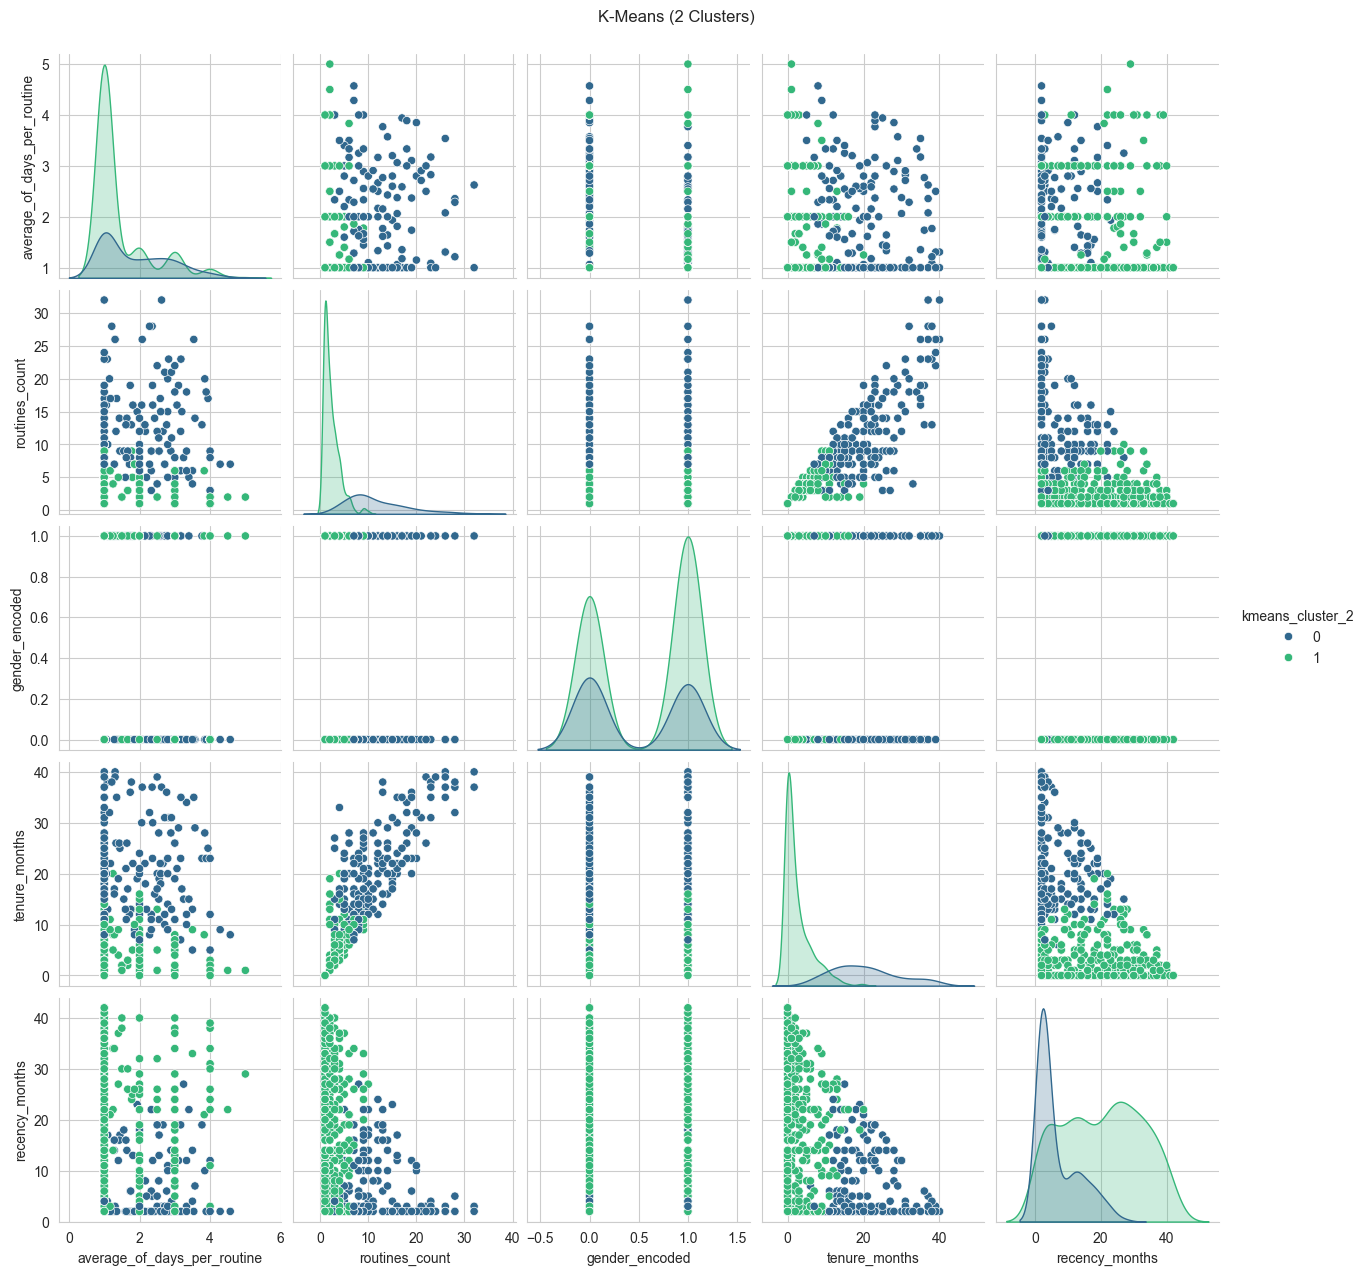

In [4]:
print(df['kmeans_cluster_2'].value_counts())

sns.pairplot(df, hue='kmeans_cluster_2', vars=vars, palette='viridis')
plt.suptitle('K-Means (2 Clusters)', y=1.02)
plt.show()

### K-Means PCA (2 Clusters)

kmeans_cluster_2_pca
1    420
0    185
Name: count, dtype: int64


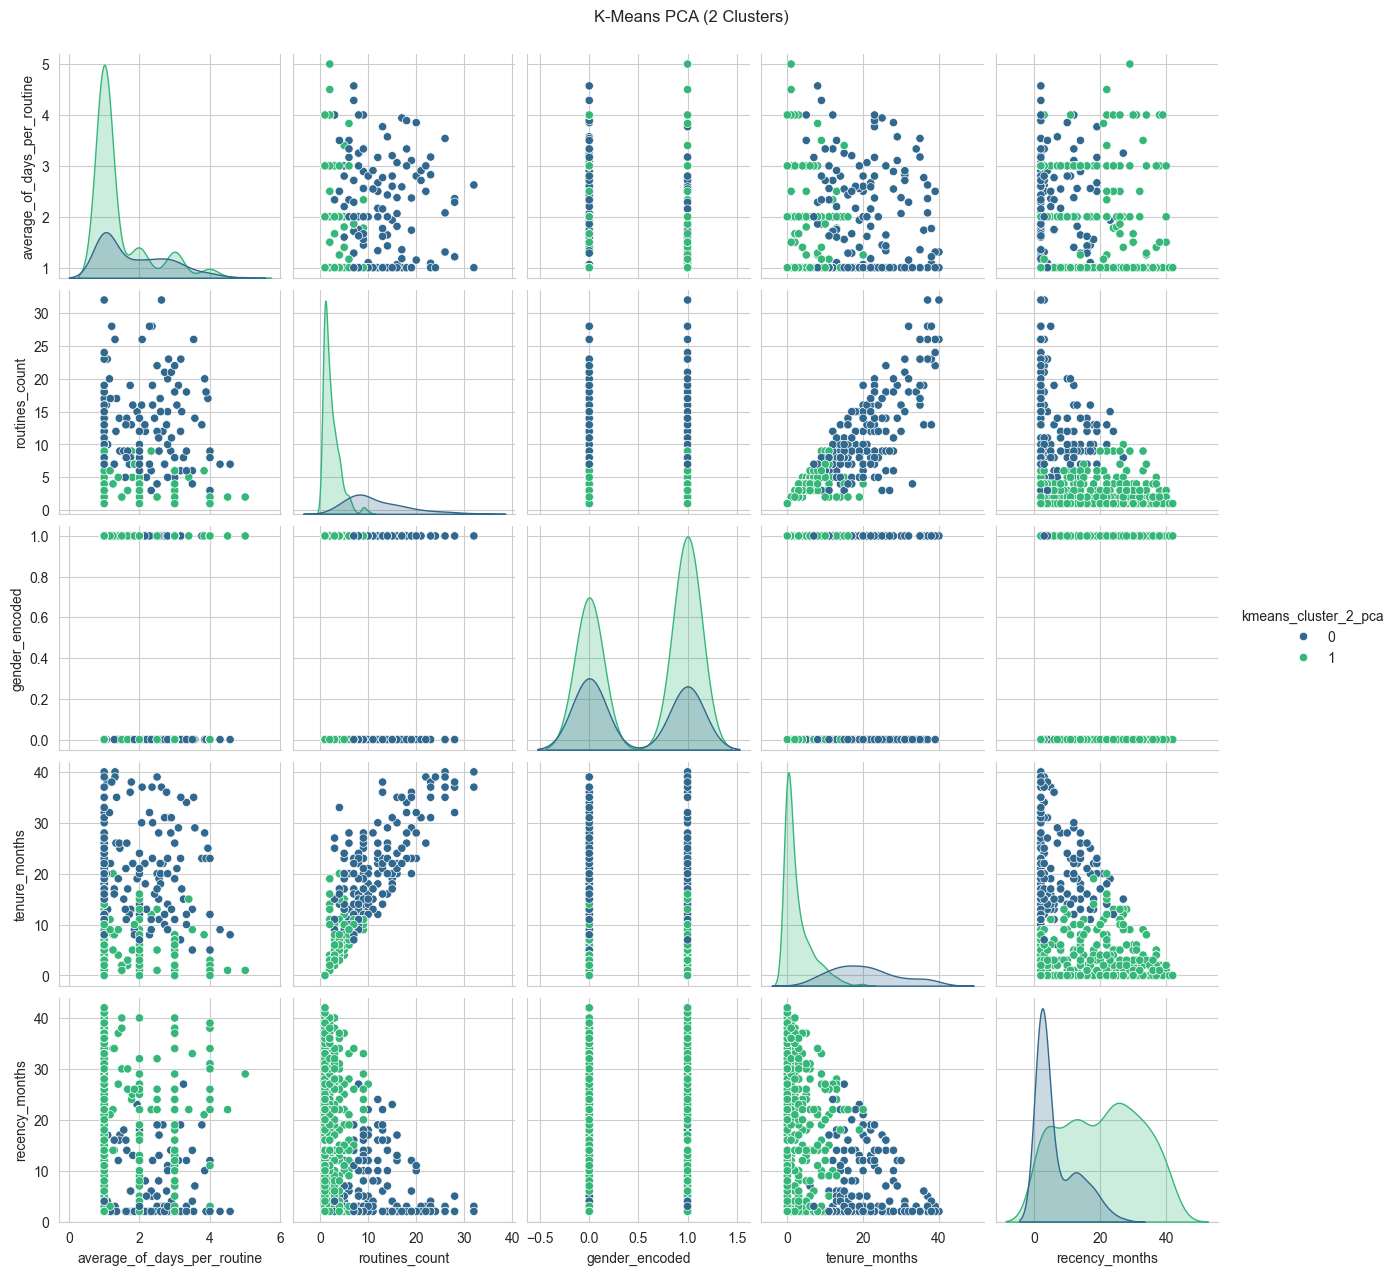

In [5]:
print(df['kmeans_cluster_2_pca'].value_counts())

sns.pairplot(df, hue='kmeans_cluster_2_pca', vars=vars, palette='viridis')
plt.suptitle('K-Means PCA (2 Clusters)', y=1.02)
plt.show()

### K-Means (3 Clusters)

kmeans_cluster_3
1    280
2    215
0    110
Name: count, dtype: int64


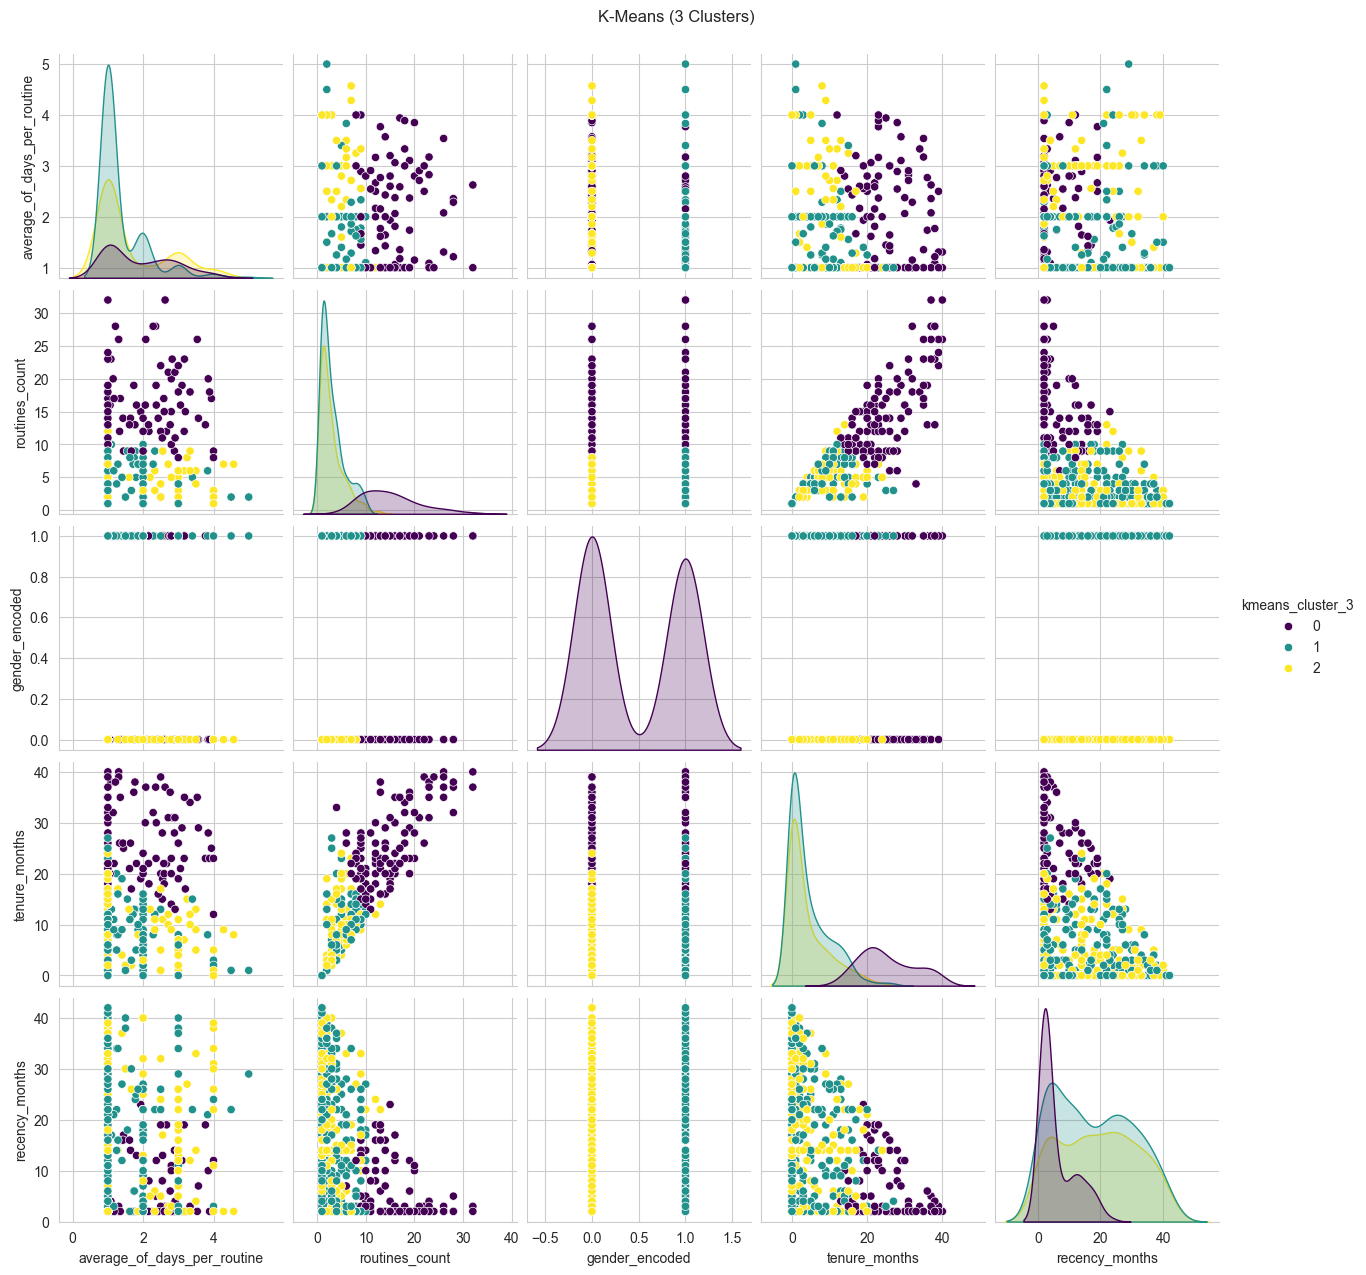

In [6]:
print(df['kmeans_cluster_3'].value_counts())

sns.pairplot(df, hue='kmeans_cluster_3', vars=vars, palette='viridis')
plt.suptitle('K-Means (3 Clusters)', y=1.02)
plt.show()

### K-Means PCA (3 Clusters)

kmeans_cluster_3
1    280
2    215
0    110
Name: count, dtype: int64


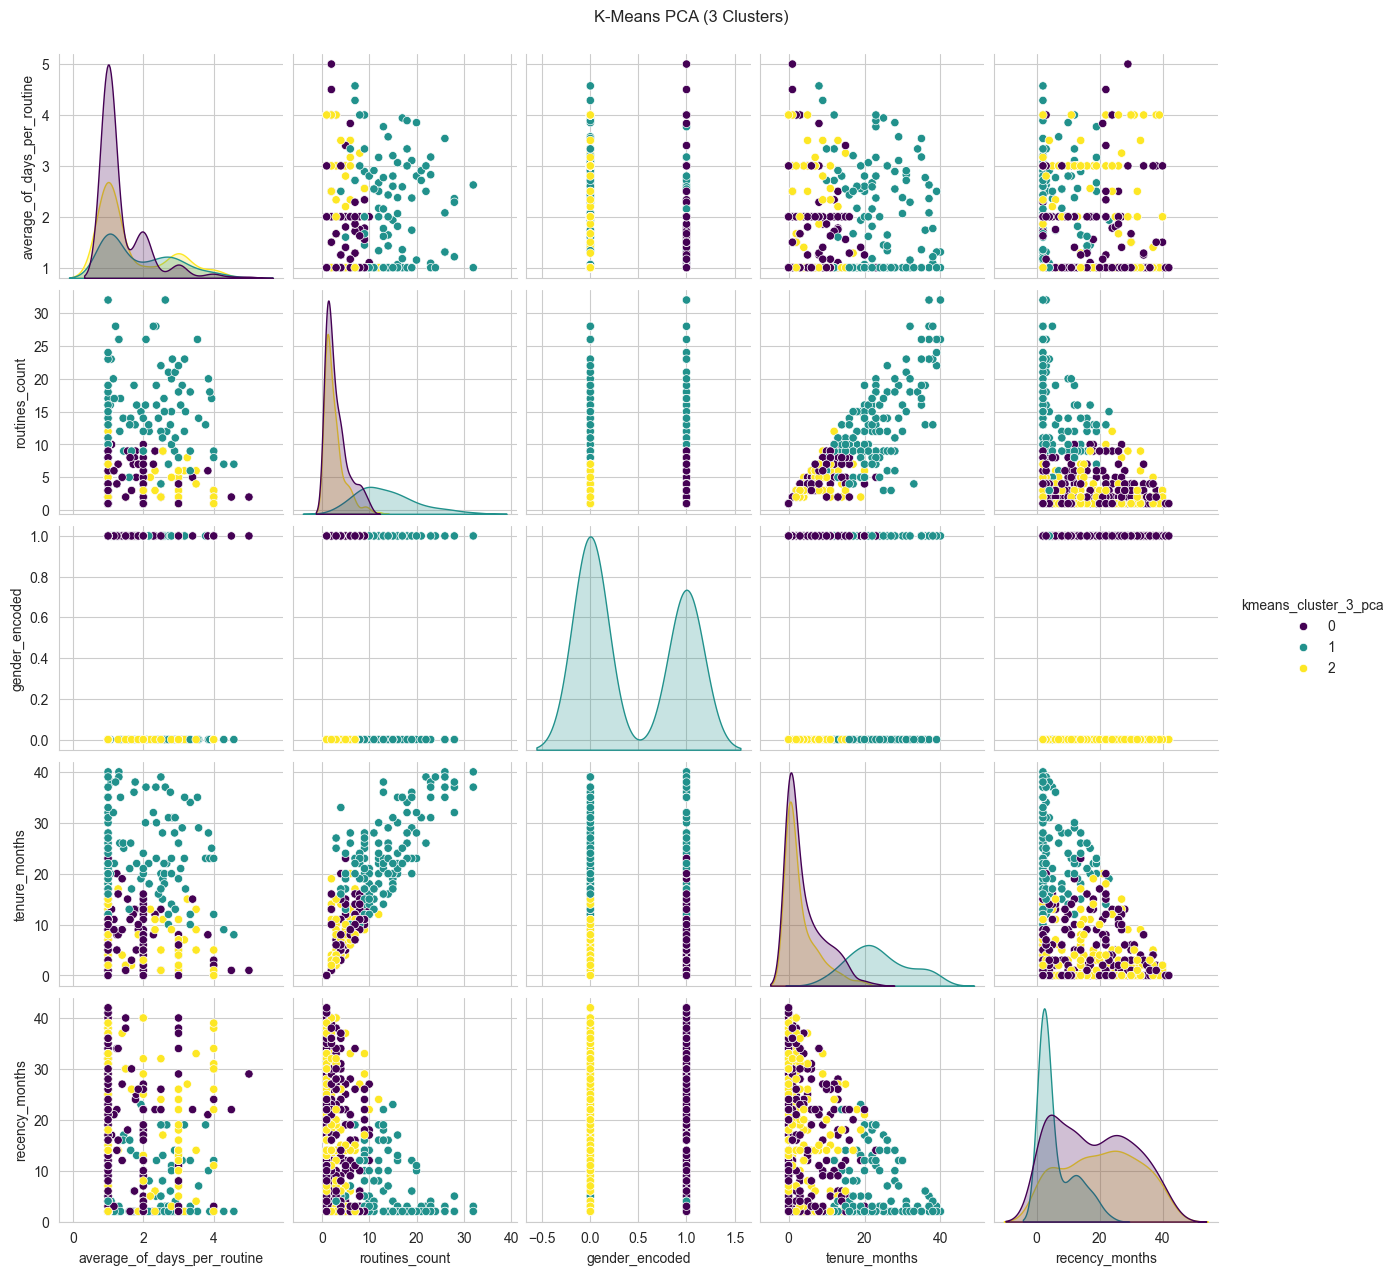

In [7]:
print(df['kmeans_cluster_3'].value_counts())

sns.pairplot(df, hue='kmeans_cluster_3_pca', vars=vars, palette='viridis')
plt.suptitle('K-Means PCA (3 Clusters)', y=1.02)
plt.show()

### DBSCAN

#### Cluster Distribution

dbscan_cluster
 1    317
 0    267
-1     21
Name: count, dtype: int64


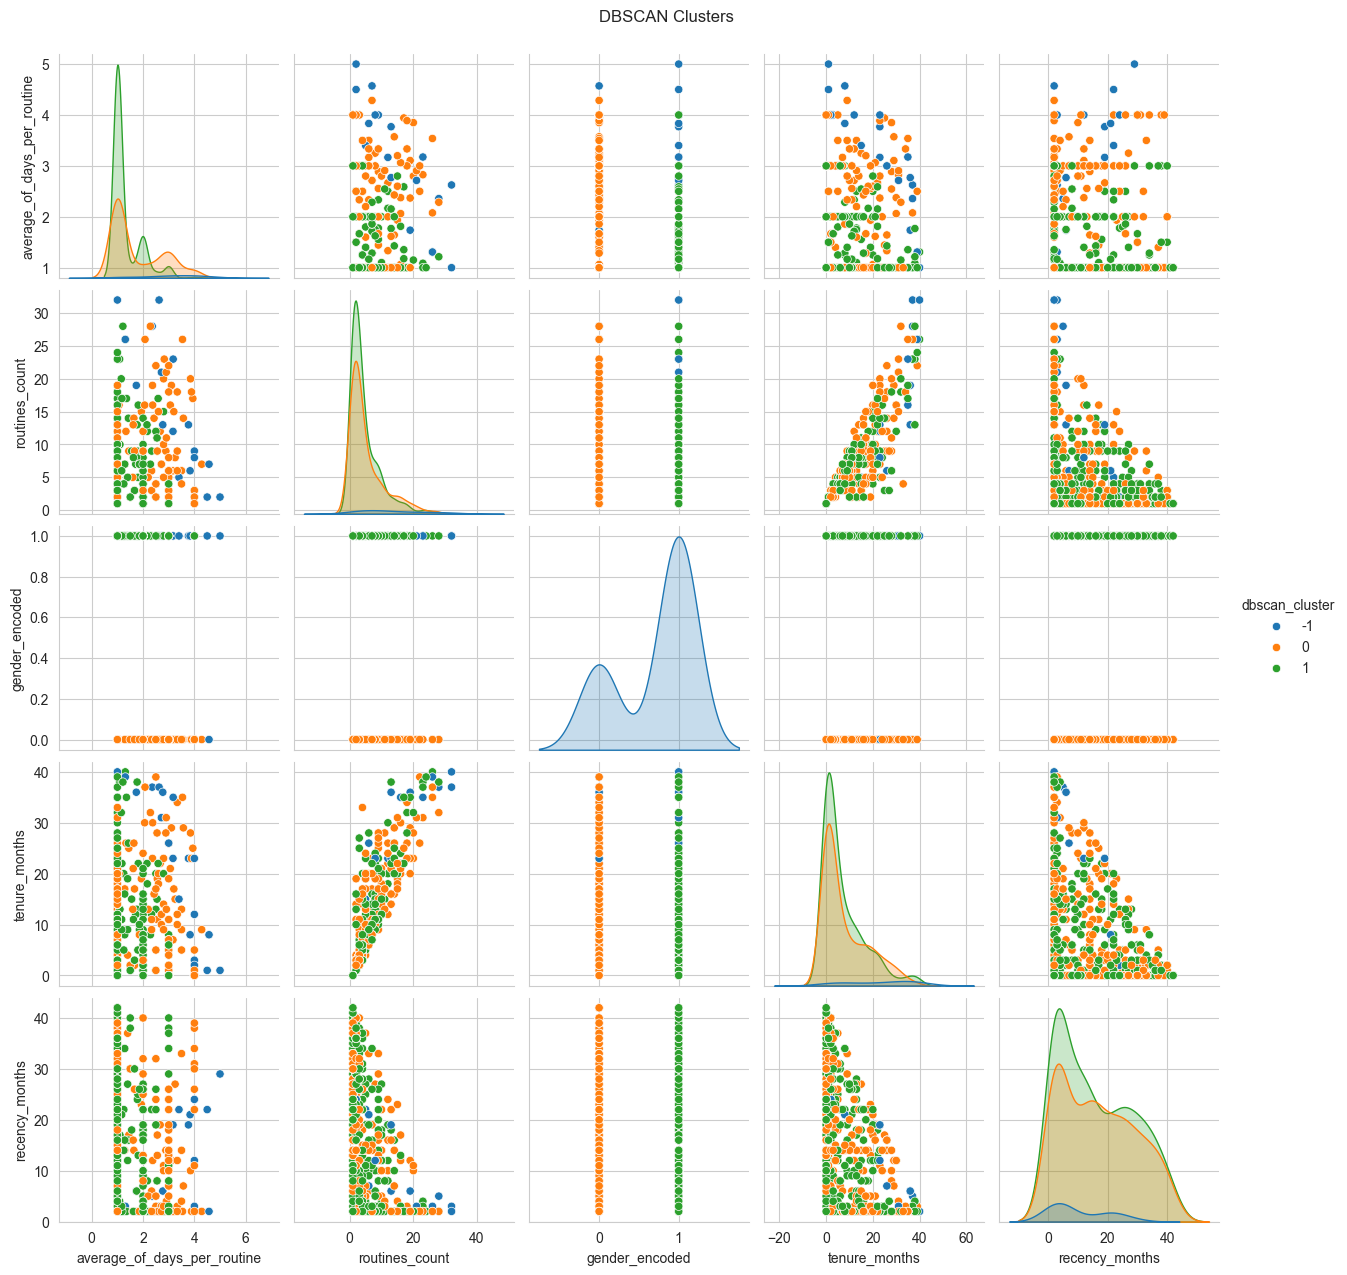

In [8]:
print(df['dbscan_cluster'].value_counts())

# Filter out noise for visualization if needed, or keep it to see where outliers are
sns.pairplot(df, hue='dbscan_cluster', vars=vars, palette='tab10')
plt.suptitle('DBSCAN Clusters', y=1.02)
plt.show()

### DBSCAN PCA

#### Cluster Distribution

dbscan_cluster_pca
 1    285
 0    174
-1     98
 2     48
Name: count, dtype: int64


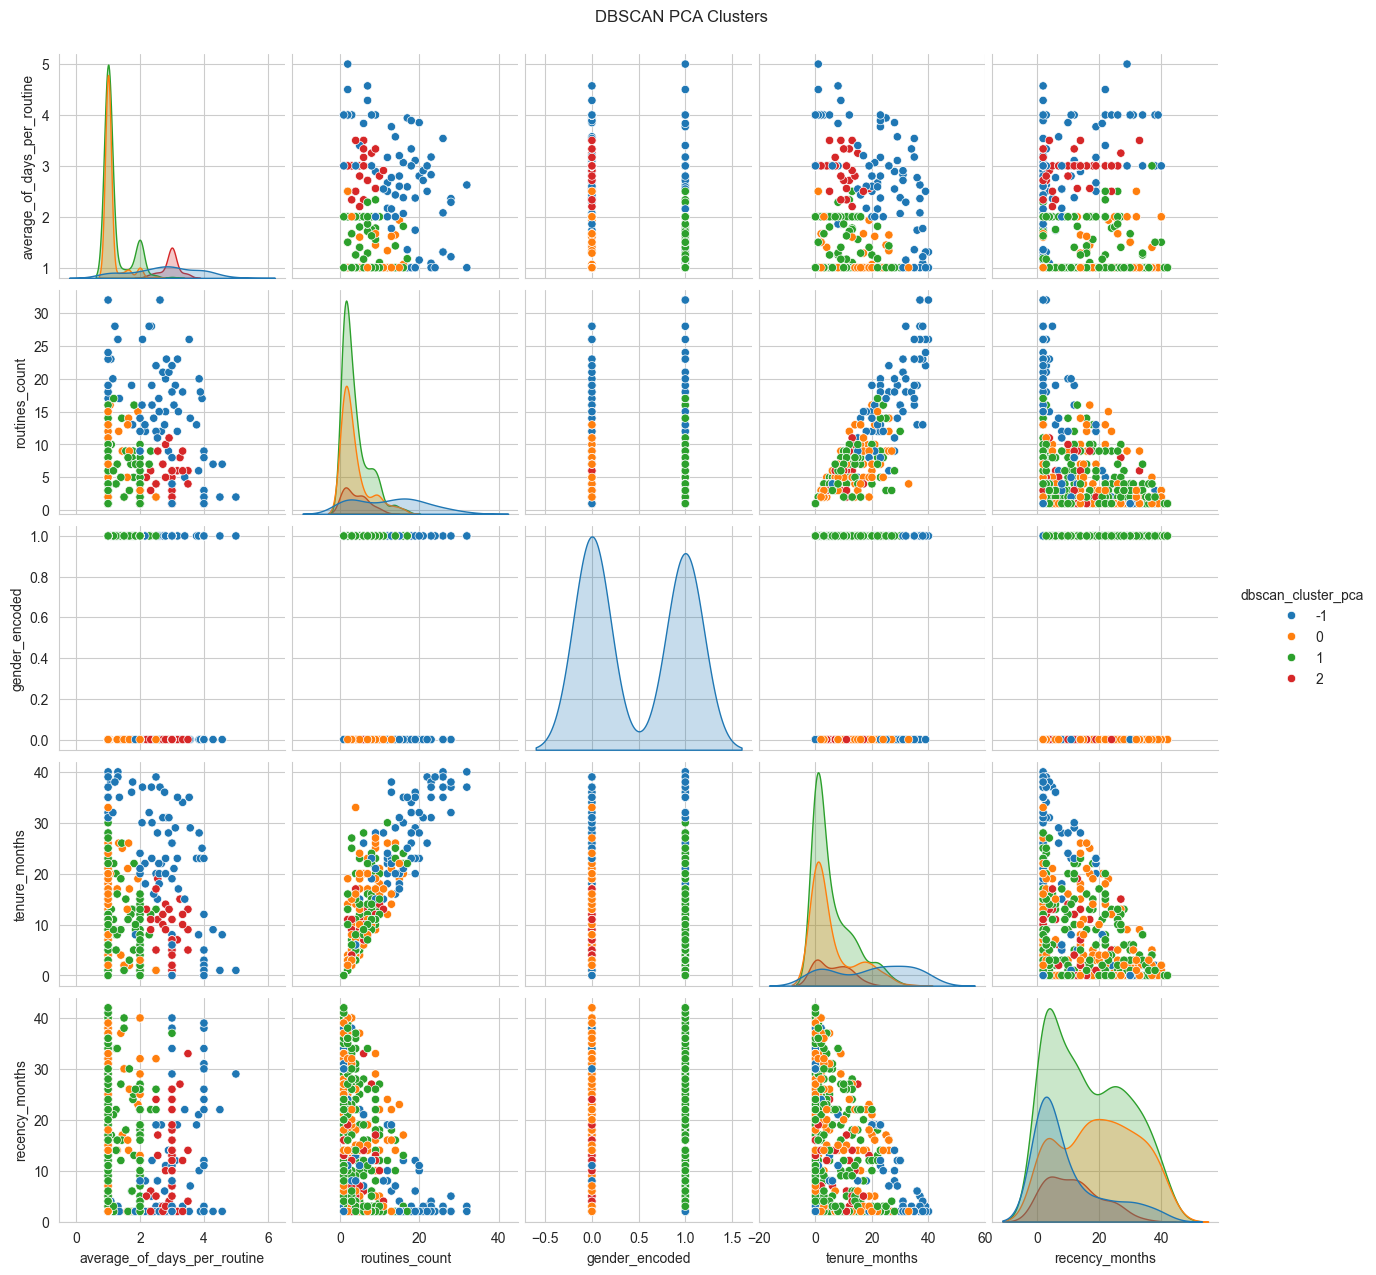

In [9]:
print(df['dbscan_cluster_pca'].value_counts())

# Filter out noise for visualization if needed, or keep it to see where outliers are
sns.pairplot(df, hue='dbscan_cluster_pca', vars=vars, palette='tab10')
plt.suptitle('DBSCAN PCA Clusters', y=1.02)
plt.show()

### Hierarchical Clustering

#### Cluster Distribution

hierarchical_cluster
2    253
0    243
1    109
Name: count, dtype: int64


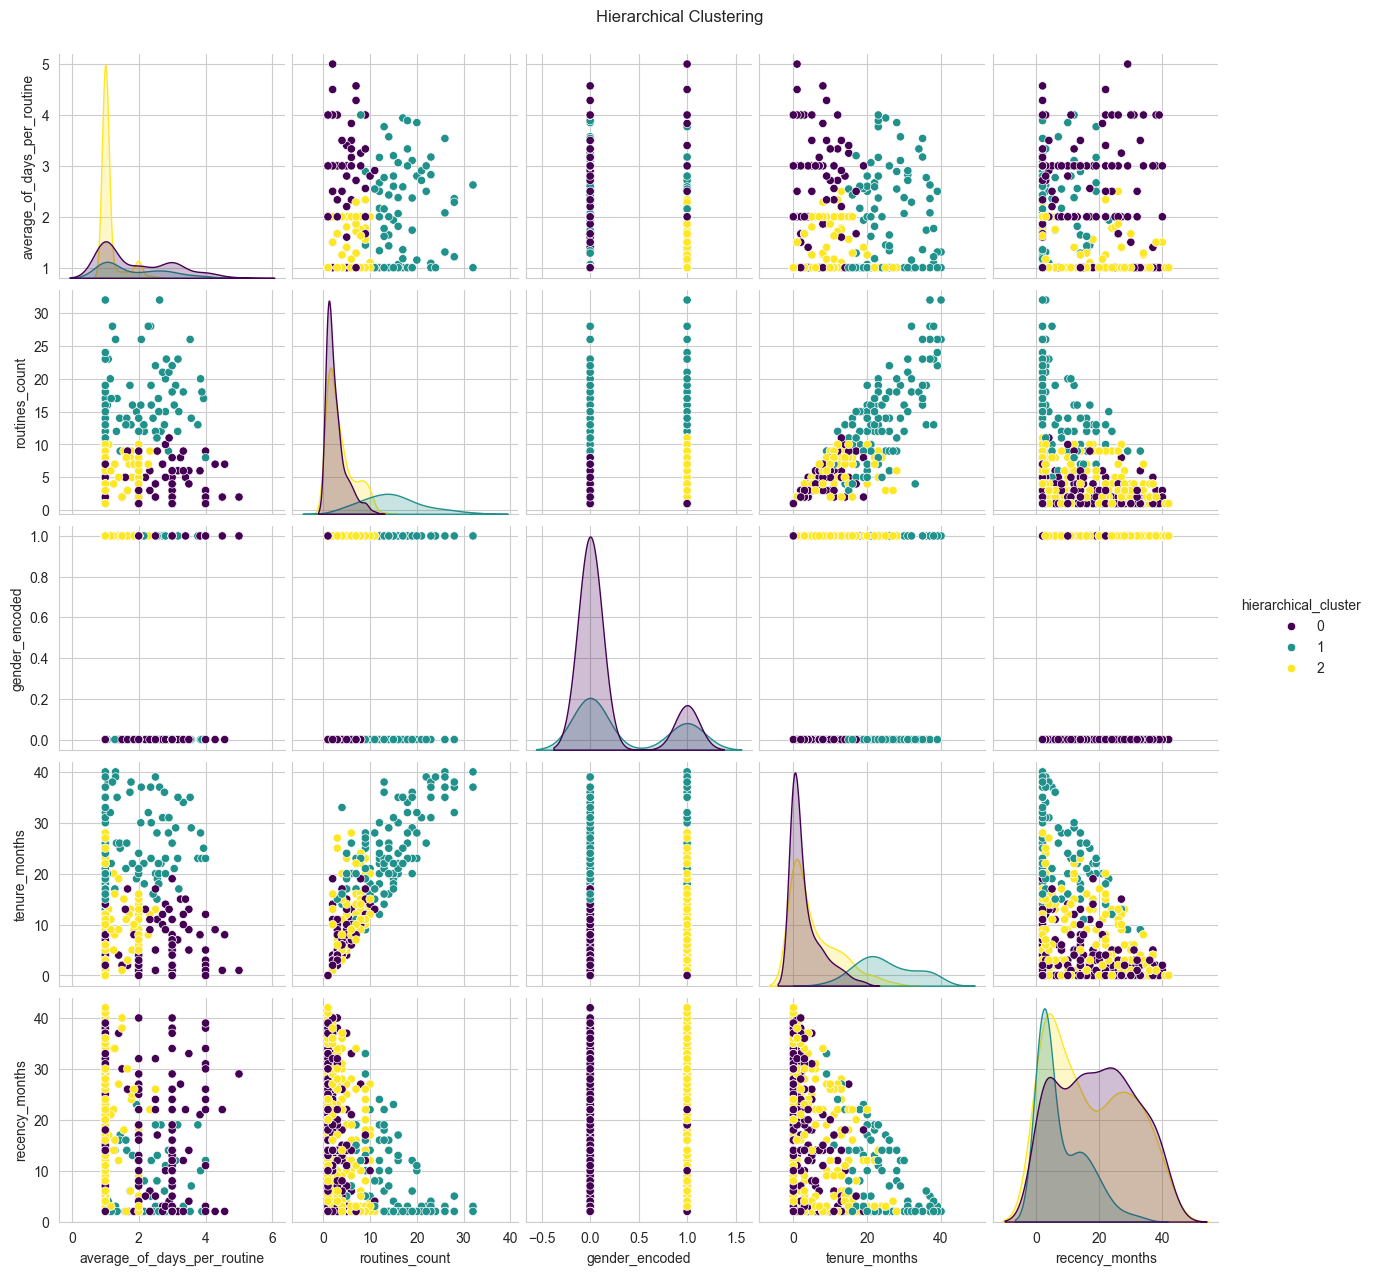

In [10]:
print(df['hierarchical_cluster'].value_counts())

sns.pairplot(df, hue='hierarchical_cluster', vars=vars, palette='viridis')
plt.suptitle('Hierarchical Clustering', y=1.02)
plt.show()

### Hierarchical Clustering PCA

#### Cluster Distribution

hierarchical_cluster_pca
2    250
0    205
1    150
Name: count, dtype: int64


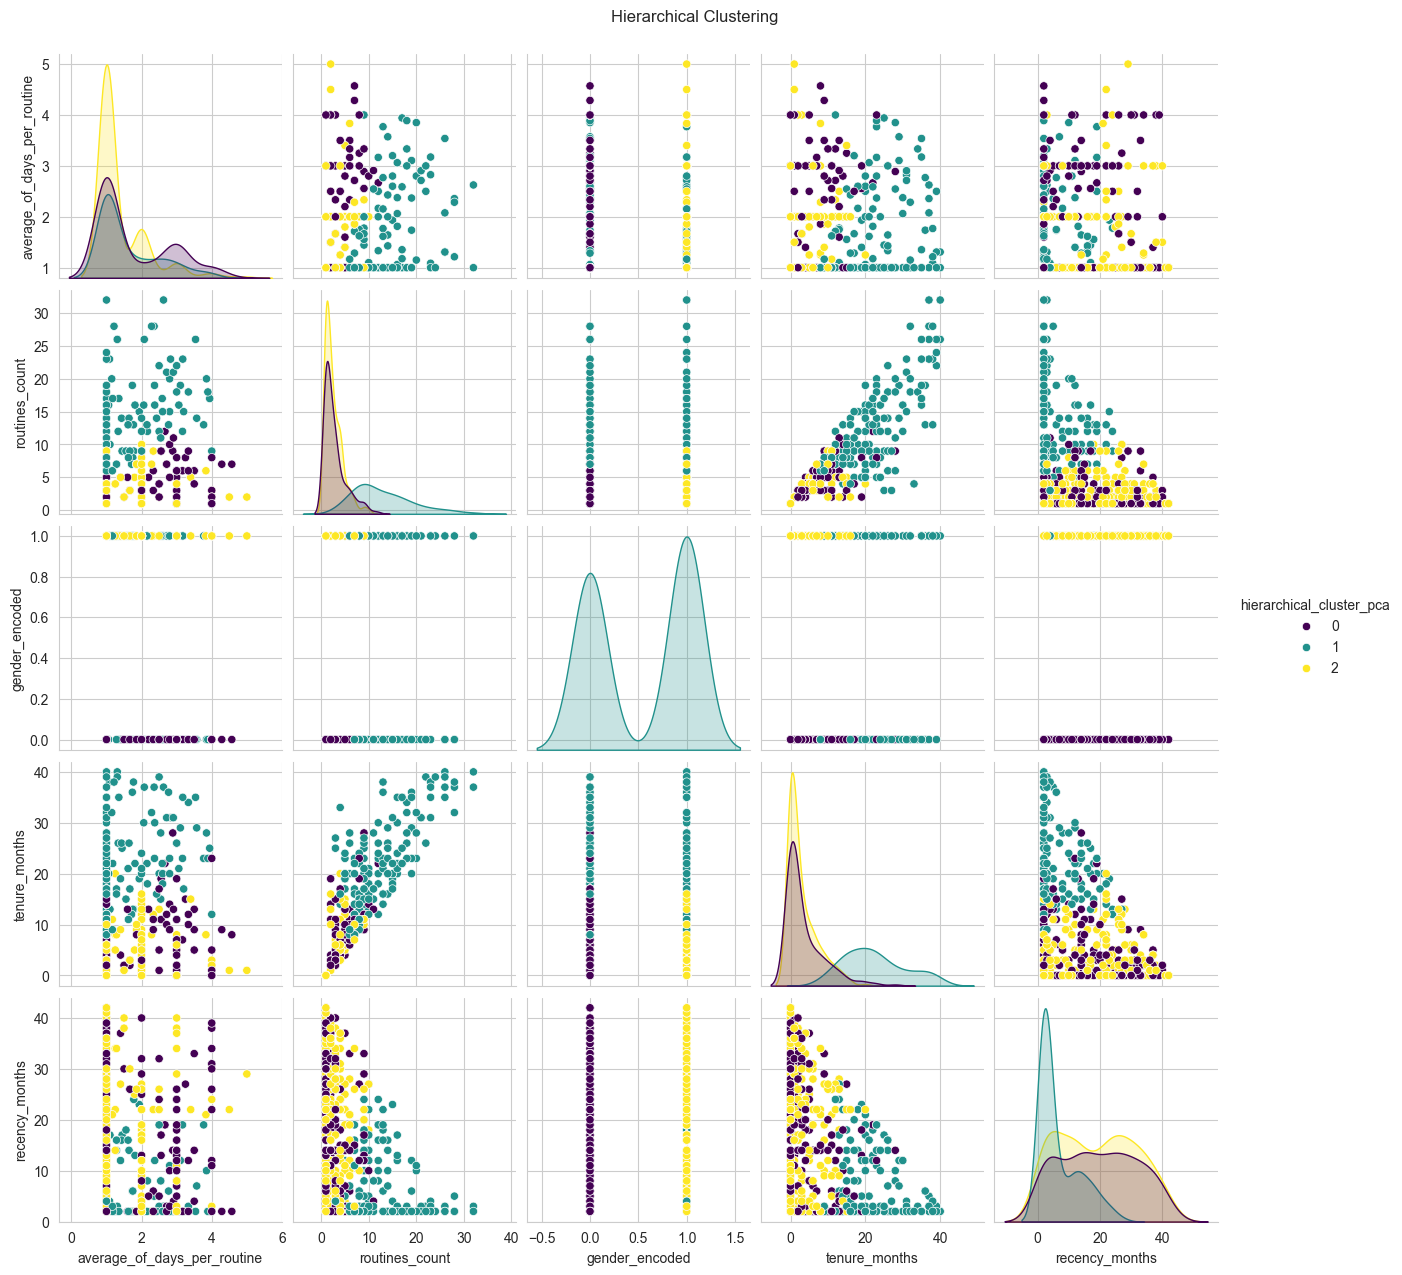

In [11]:
print(df['hierarchical_cluster_pca'].value_counts())

sns.pairplot(df, hue='hierarchical_cluster_pca', vars=vars, palette='viridis')
plt.suptitle('Hierarchical Clustering', y=1.02)
plt.show()

## Silhouette Score Calculation

Now, let's calculate the Silhouette score for each clustering algorithm to evaluate their performance. A higher Silhouette score indicates better-defined clusters.

In [21]:
clustering_columns = [
    'kmeans_cluster_2',
    'kmeans_cluster_2_pca',
    'kmeans_cluster_3',
    'kmeans_cluster_3_pca',
    'dbscan_cluster',
    'dbscan_cluster_pca',
    'hierarchical_cluster',
    'hierarchical_cluster_pca'
]

scaler = StandardScaler()
X = scaler.fit_transform(df[vars])

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

print("Silhouette Scores:")
for col in clustering_columns:
    # DBSCAN can produce noise points labeled as -1, which should be handled before calculating silhouette score
    # We'll filter out noise points for DBSCAN if they exist and recalculate X and labels for that specific calculation
    
    if 'dbscan_cluster' in col and -1 in df[col].unique():
        # Filter out noise points for Silhouette score calculation for DBSCAN
        df_without_noise = df[df[col] != -1]
        X_dbscan = scaler.fit_transform(df_without_noise[vars]) 
        if 'pca' in col:
            X_dbscan = pca.fit_transform(X_dbscan)
        if not filtered_df.empty:
            # Use the same features as X for silhouette calculation
            labels = df_without_noise[col]
            if len(labels.unique()) > 1: # Silhouette score requires at least 2 clusters
                score = silhouette_score(X_dbscan, labels)
                print(f"  {col}: {score:.4f} (excluding noise points)")
            else:
                print(f"  {col}: Not applicable (only one cluster after removing noise)")
        else:
            print(f"  {col}: Not applicable (no points remaining after removing noise)")
    else:
        # For other algorithms, or if no noise in DBSCAN, calculate directly
        labels = df[col]
        if len(labels.unique()) > 1: # Silhouette score requires at least 2 clusters
            if 'pca' in col:
                score = silhouette_score(X_pca, labels)                
            else:
                score = silhouette_score(X, labels)
            print(f"  {col}: {score:.4f}")
        else:
            print(f"  {col}: Not applicable (only one cluster or all points in noise)")

Silhouette Scores:
  kmeans_cluster_2: 0.3232
  kmeans_cluster_2_pca: 0.3780
  kmeans_cluster_3: 0.3154
  kmeans_cluster_3_pca: 0.3870
  dbscan_cluster: 0.2703 (excluding noise points)
  dbscan_cluster_pca: 0.3154 (excluding noise points)
  hierarchical_cluster: 0.2688
  hierarchical_cluster_pca: 0.3714


## Final model selection

Model kmeans_cluster_2 was chosen based on a combination of Silhouette Score validation and business heuristic alignment. This model provides the most distinct separation between clusters, ensuring that the customer segments are statistically robust and practically meaningful for operational deployment.